In [1]:
#Import relevant packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
from scipy import stats
import seaborn as sns

%matplotlib inline 

pd.set_option('display.max_columns', None)

In [2]:
!ls

Movie_Studio_Strategy_Recommendation.ipynb
README.md
data


In [3]:
!ls data

README.md               rt.movie_info.tsv.gz    tn.movie_budgets.csv.gz
bom.movie_gross.csv.gz  rt.reviews.tsv.gz
im.db                   tmdb.movies.csv.gz


In [4]:
#Initiating SQL connection

conn = sqlite3.connect('data/im.db')
cursor = conn.cursor()

In [5]:
#Tables and schema

df = pd.read_sql("""
SELECT *
FROM sqlite_master""", conn)

df

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [6]:
movie_gross_df = pd.read_csv("data/bom.movie_gross.csv.gz")

movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [7]:
movie_info_df = pd.read_csv("data/rt.movie_info.tsv.gz", sep="\t", encoding='windows-1252')

movie_info_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [8]:
movie_reviews_df = pd.read_csv("data/rt.reviews.tsv.gz", sep="\t", encoding='windows-1252')

movie_reviews_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [9]:
movie_tmdb_df = pd.read_csv("data/tmdb.movies.csv.gz")

movie_tmdb_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [10]:
movie_budget_df = pd.read_csv("data/tn.movie_budgets.csv.gz")

movie_budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [11]:
#Pulling needed data from IMDB database using SQL

df_movie_imdb = pd.read_sql("""
  SELECT *
        
    FROM movie_basics
    """, conn)

In [12]:
#Combining Movie Budget Database with IMDB information

df_merged_mb = movie_budget_df.merge(df_movie_imdb, left_on='movie', right_on='primary_title')

df_merged_mb

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",tt1775309,Avatar,Abatâ,2011,93.0,Horror
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi"
4,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...,...,...,...,...
3810,68,"Jul 6, 2001",Cure,"$10,000","$94,596","$94,596",tt5936960,Cure,Cure,2014,NaN,None
3811,70,"Apr 1, 1996",Bang,"$10,000",$527,$527,tt6616538,Bang,Bang,2015,NaN,None
3812,73,"Jan 13, 2012",Newlyweds,"$9,000","$4,584","$4,584",tt1880418,Newlyweds,Newlyweds,2011,95.0,"Comedy,Drama"
3813,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,tt7837402,Red 11,Red 11,2019,77.0,"Horror,Sci-Fi,Thriller"


In [13]:
df_merged_mb['production_budget'] = df_merged_mb['production_budget'].str.replace('$','').str.replace(',','').astype(np.int64)
df_merged_mb['domestic_gross'] = df_merged_mb['domestic_gross'].str.replace('$','').str.replace(',','').astype(np.int64)
df_merged_mb['worldwide_gross'] = df_merged_mb['worldwide_gross'].str.replace('$','').str.replace(',','').astype(np.int64)

In [14]:
df_merged_mb['profit'] = df_merged_mb['worldwide_gross'] - df_merged_mb['production_budget']

In [15]:
df_merged_mb

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,tt1775309,Avatar,Abatâ,2011,93.0,Horror,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",1072413963
4,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",1748134200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810,68,"Jul 6, 2001",Cure,10000,94596,94596,tt5936960,Cure,Cure,2014,NaN,None,84596
3811,70,"Apr 1, 1996",Bang,10000,527,527,tt6616538,Bang,Bang,2015,NaN,None,-9473
3812,73,"Jan 13, 2012",Newlyweds,9000,4584,4584,tt1880418,Newlyweds,Newlyweds,2011,95.0,"Comedy,Drama",-4416
3813,78,"Dec 31, 2018",Red 11,7000,0,0,tt7837402,Red 11,Red 11,2019,77.0,"Horror,Sci-Fi,Thriller",-7000


In [16]:
df_merged_mb = df_merged_mb[df_merged_mb['movie']!= 'Home']

In [17]:
df_merged_mb = df_merged_mb[df_merged_mb['production_budget'] >= 1000000]

In [18]:
df_merged_mb = df_merged_mb.dropna(subset = ['genres'])

In [19]:
df_merged_mb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3365 entries, 0 to 3520
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3365 non-null   int64  
 1   release_date       3365 non-null   object 
 2   movie              3365 non-null   object 
 3   production_budget  3365 non-null   int64  
 4   domestic_gross     3365 non-null   int64  
 5   worldwide_gross    3365 non-null   int64  
 6   movie_id           3365 non-null   object 
 7   primary_title      3365 non-null   object 
 8   original_title     3365 non-null   object 
 9   start_year         3365 non-null   int64  
 10  runtime_minutes    2971 non-null   float64
 11  genres             3365 non-null   object 
 12  profit             3365 non-null   int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 368.0+ KB


In [20]:
# Grouping profit by comedy 
comedy_profit = df_merged_mb[df_merged_mb['genres'].str.contains('Comedy')]['profit']
adventure_profit = df_merged_mb[df_merged_mb['genres'].str.contains('Adventure')]['profit']
action_profit = df_merged_mb[df_merged_mb['genres'].str.contains('Action')]['profit']
drama_profit = df_merged_mb[df_merged_mb['genres'].str.contains('Drama')]['profit']
horror_profit = df_merged_mb[df_merged_mb['genres'].str.contains('Horror')]['profit']
scifi_profit = df_merged_mb[df_merged_mb['genres'].str.contains('Sci-Fi')]['profit']
musical_profit = df_merged_mb[df_merged_mb['genres'].str.contains('Musical')]['profit']

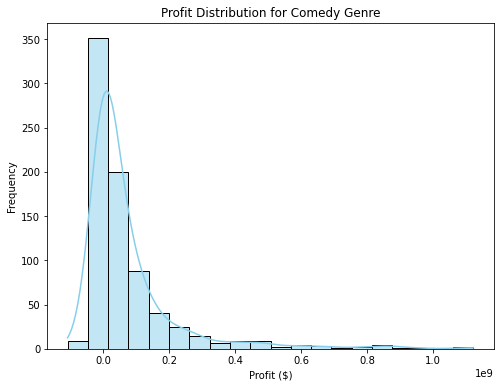

In [21]:
# Plotting - this visualizes the distribuation of profit for comedy movies 

plt.figure(figsize=(8, 6))
sns.histplot(comedy_profit, color='skyblue', bins=20, kde=True)

# Adding labels and title
plt.xlabel('Profit ($)')
plt.ylabel('Frequency')
plt.title('Profit Distribution for Comedy Genre')

# Show plot
plt.show()

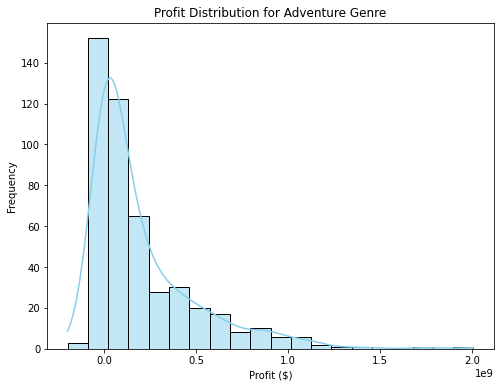

In [22]:
# Plotting - this visualizes the distribuation of profit for adventure movies 

plt.figure(figsize=(8, 6))
sns.histplot(adventure_profit, color='skyblue', bins=20, kde=True)

# Adding labels and title
plt.xlabel('Profit ($)')
plt.ylabel('Frequency')
plt.title('Profit Distribution for Adventure Genre')

# Show plot
plt.show()

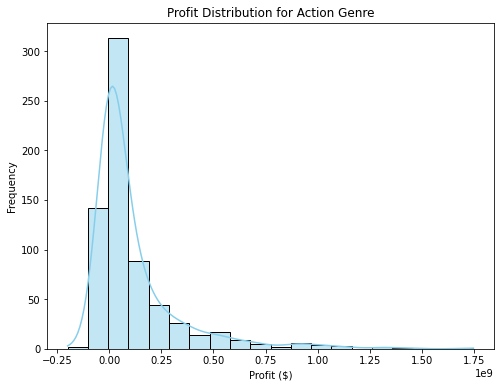

In [23]:
# Plotting - this visualizes the distribuation of profit for action movies 

plt.figure(figsize=(8, 6))
sns.histplot(action_profit, color='skyblue', bins=20, kde=True)

# Adding labels and title
plt.xlabel('Profit ($)')
plt.ylabel('Frequency')
plt.title('Profit Distribution for Action Genre')

# Show plot
plt.show()

In [24]:
comedy_mean_profit = comedy_profit.mean()
comedy_median_profit = comedy_profit.median()
print(comedy_mean_profit)
print(comedy_median_profit)

75222558.21141374
21078541.0


In [25]:
adventure_mean_profit = adventure_profit.mean()
adventure_median_profit = adventure_profit.median()
print(adventure_mean_profit)
print(adventure_median_profit)

201471744.25581396
73336398.0


In [26]:
action_mean_profit = action_profit.mean()
action_median_profit = action_profit.median()
print(action_mean_profit)
print(action_median_profit)

118845445.04270987
33306268.0


In [27]:
drama_mean_profit = drama_profit.mean()
drama_median_profit = drama_profit.median()
print(drama_mean_profit)
print(drama_median_profit)

37608022.178266175
4852084.0


In [28]:
horror_mean_profit = horror_profit.mean()
horror_median_profit = horror_profit.median()
print(horror_mean_profit)
print(horror_median_profit)

49026151.505494505
12067488.0


In [29]:
scifi_mean_profit = scifi_profit.mean()
scifi_median_profit = scifi_profit.median()
print(scifi_mean_profit)
print(scifi_median_profit)

172679590.96666667
29571147.5


In [30]:
musical_mean_profit = musical_profit.mean()
musical_median_profit = musical_profit.median()
print(musical_mean_profit)
print(musical_median_profit)

193801914.36363637
37700000.0


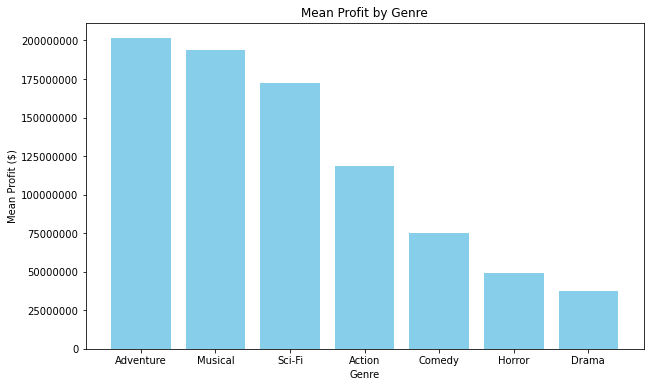

In [31]:
# Visual for mean profit v genre 
genres = ['Adventure', 'Musical', 'Sci-Fi', 'Action', 'Comedy', 'Horror', 'Drama']
means = [adventure_mean_profit, musical_mean_profit, scifi_mean_profit, action_mean_profit, 
        comedy_mean_profit, horror_mean_profit, drama_mean_profit]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(genres, means, color='skyblue')

# Adding labels and title
plt.xlabel('Genre')
plt.ylabel('Mean Profit ($)')
plt.title('Mean Profit by Genre')
plt.ticklabel_format(style = 'plain', axis='y')

# Show plot
plt.show()

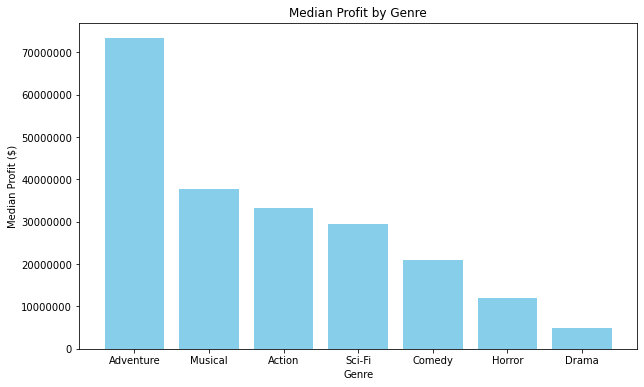

In [32]:
# Visual for median profit v genre 
genres = ['Adventure', 'Musical', 'Action', 'Sci-Fi', 'Comedy', 'Horror', 'Drama']
medians = [adventure_median_profit, musical_median_profit, action_median_profit, scifi_median_profit,
          comedy_median_profit, horror_median_profit, drama_median_profit]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(genres, medians, color='skyblue')

# Adding labels and title
plt.xlabel('Genre')
plt.ylabel('Median Profit ($)')
plt.title('Median Profit by Genre')
plt.ticklabel_format(style = 'plain', axis='y')

# Show plot
plt.show()